In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


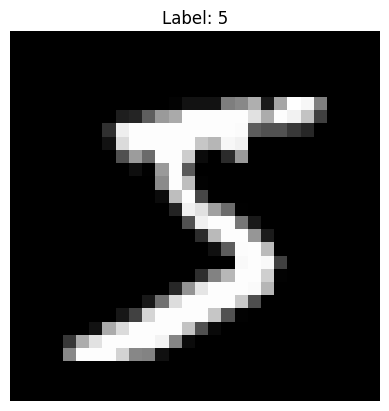

In [ ]:
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [ ]:
print(f" Eğitim veri sayısı: {x_train.shape[0]}")
print(f" Test veri sayısı: {x_test.shape[0]}")
print(f" Sınıf sayısı: {len(np.unique(y_train))}")

 Eğitim veri sayısı: 60000
 Test veri sayısı: 10000
 Sınıf sayısı: 10


In [ ]:
num_samples = x_train.shape[0]

random_indices = np.random.choice(num_samples, size=5000, replace=False)

x_train_small = x_train[random_indices]
y_train_small = y_train[random_indices]

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train_small, y_train_small,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])


Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.4148 - loss: 7.3612 - val_accuracy: 0.8987 - val_loss: 0.3573
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.8492 - loss: 0.5228 - val_accuracy: 0.9373 - val_loss: 0.2121
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.9056 - loss: 0.3333 - val_accuracy: 0.9576 - val_loss: 0.1492
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.9241 - loss: 0.2464 - val_accuracy: 0.9543 - val_loss: 0.1543
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9360 - loss: 0.1951 - val_accuracy: 0.9654 - val_loss: 0.1139
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9480 - loss: 0.1654 - val_accuracy: 0.9689 - val_loss: 0.1075
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.9589 - loss: 0.1374 - val_accuracy: 0.9709 - val_loss: 0.1035
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.9666 - loss: 0.1077 - val_

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


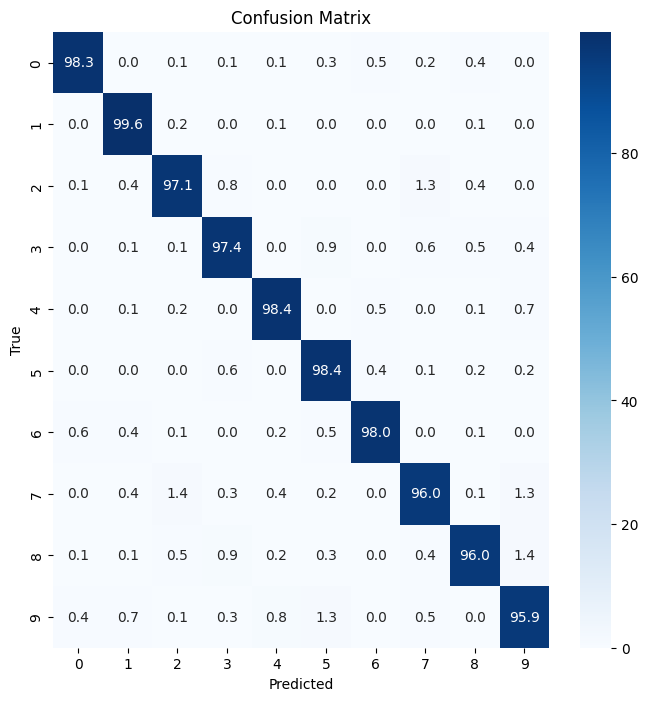

In [ ]:
import seaborn as sns
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.1f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

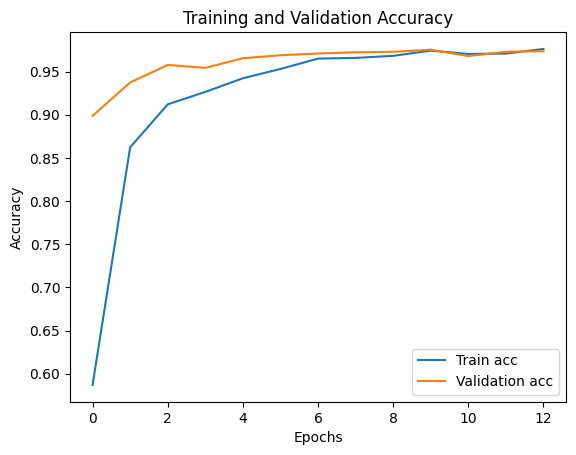

In [ ]:

plt.plot(history.history["accuracy"], label="Train acc")
plt.plot(history.history["val_accuracy"], label="Validation acc")

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

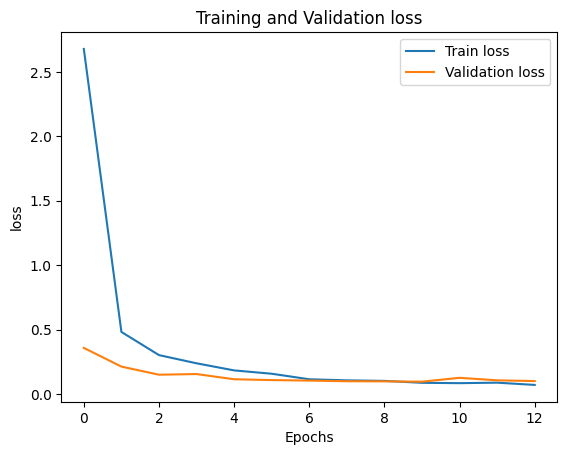

In [ ]:

plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Validation loss")

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Eğitim Doğruluğu: {train_acc:.4f}")
print(f"Doğrulama Doğruluğu: {val_acc:.4f}")
print(f"Test Doğruluğu: {test_acc:.4f}")

Eğitim Doğruluğu: 0.9762
Doğrulama Doğruluğu: 0.9735
Test Doğruluğu: 0.9753
